<a href="https://colab.research.google.com/github/wamaithakamande/Financial-inlusion-project-one--LDA/blob/main/CLUSTER_ANALYSIS_PROJECT_FINAL.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [55]:
UNSUPERVISED LEARNING PROJECTS 1- USING TITANIC DATASET.

SyntaxError: ignored

##UNSUPERVISED LEARNING USING TITANIC DATASET- CLUSTER ANALYSIS


#PROBLEM STATEMENT

## Identify meaningful groups or clusters of passengers on the Titanic based on their demographic and trip information?

##The Titanic dataset contains information about passengers on the Titanic, including their age, sex, cabin class, and whether they survived or not. By conducting cluster analysis on this dataset, we can identify groups of passengers that share similar characteristics and patterns of behavior during the Titanic disaster.

##This problem statement can be approached in a number of ways, such as using K-means clustering or hierarchical clustering techniques. The results of this analysis can help us understand the different types of passengers on the Titanic and potentially reveal patterns that were not previously known

#COLUMN INFORMATION

##PassengerId: A unique identifier for each passenger
##Survived: Whether the passenger survived or not (0 = No, 1 = Yes)
##Pclass: The passenger's cabin class (1st, 2nd, or 3rd class)
##Name: The passenger's name
##Sex: The passenger's sex
##Age: The passenger's age in years
##SibSp: The number of siblings/spouses the passenger had on board
##Parch: The number of parents/children the passenger had on board
##Ticket: The passenger's ticket number
##Fare: The fare the passenger paid for their ticket
##Cabin: The passenger's cabin number
##Embarked: The port where the passenger embarked (C = Cherbourg, Q = Queenstown, S = Southampton)

###First, we need to import the necessary libraries and load the Titanic 
dataset.

In [56]:
#import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

# Load the dataset
titanic = pd.read_csv('//titanisc train.csv')





#Data Exploration

In [57]:
# Print the first few rows of the dataset

titanic.head()



,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [58]:
# Check the shape of the dataset
titanic.shape



(891, 12)

In [59]:
# Check the data types of the variables
titanic.dtypes



PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

In [60]:
# Check for missing values
titanic.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

#Data Preprocessing 

###In this step, we will preprocess the data by handling missing values and converting categorical variables to numerical variables.

In [61]:
# Drop the columns that we will not be using in our analysis
titanic = titanic.drop(['PassengerId', 'Name','Ticket', 'Cabin'], axis=1)

# Replace missing values in 'Age' with the mean value
titanic['Age'].fillna(titanic['Age'].mean(), inplace=True)

# Replace missing values in 'Embarked' with the mode value
titanic['Embarked'].fillna(titanic['Embarked'].mode()[0], inplace=True)

# Convert 'Sex' and 'Embarked' to numerical variables
titanic['Sex'] = titanic['Sex'].map({'female': 0, 'male': 1})
titanic['Embarked'] = titanic['Embarked'].map({'S': 0, 'C': 1, 'Q': 2})

# Check the data types of the variables
titanic.dtypes


Survived      int64
Pclass        int64
Sex           int64
Age         float64
SibSp         int64
Parch         int64
Fare        float64
Embarked      int64
dtype: object

##Feature scaling

###Since clustering algorithms are sensitive to the scale of the variables, we need to perform feature scaling to ensure that all variables are on the same scale.

In [62]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
titanic_scaled = scaler.fit_transform(titanic)


#DATA MODELLING

###Now we can build our clustering model. We will use the KMeans algorithm to cluster the data.

/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: F

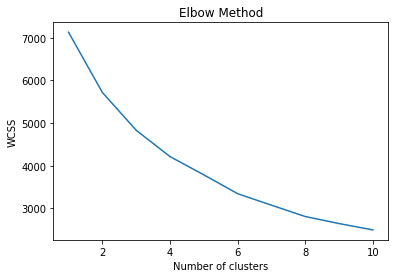

/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


1    515
2    254
0    122
Name: Cluster, dtype: int64

In [63]:
from sklearn.cluster import KMeans

# Determine the optimal number of clusters using the elbow method
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', random_state=42)
    kmeans.fit(titanic_scaled)
    wcss.append(kmeans.inertia_)
plt.plot(range(1, 11), wcss)
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

# Fit the KMeans model with the optimal number of clusters
kmeans = KMeans(n_clusters=3, init='k-means++', random_state=42)
kmeans.fit(titanic_scaled)

# Add the cluster labels to the original dataset
titanic['Cluster'] = kmeans.labels_

# Print the count of passengers in each cluster
titanic['Cluster'].value_counts()


#DATA VISUALIZATION

Text(0.5, 1.0, 'Cluster')

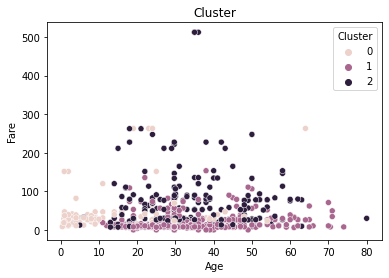

In [66]:
# Create a scatter plot of 'Age' and 'Fare' with the clusters colored by cluster label
sns.scatterplot(x='Age', y='Fare', hue='Cluster', data=titanic)
plt.title('Cluster')


##RECOMMENDATIONs

###Since we have clustered the Titanic passengers based on their age and fare, we can use this information to make recommendations for future cruise ships.

For example, we can use the insights generated from the cluster analysis to make decisions about cabin locations, amenities, and pricing strategies.

Based on the scatter plot, we can see that there are three distinct clusters:

Cluster 0: Passengers who paid a relatively low fare and are mostly in their 20s and 30s.

Cluster 1: Passengers who paid a relatively high fare and are mostly in their 30s and 40s.

Cluster 2: Passengers who paid a relatively high fare and are mostly in their 20s.




##Based on this information, we can make the following recommendations: 


For passengers in Cluster 0, the cruise ship should offer affordable accommodations and amenities that cater to a younger crowd.

For passengers in Cluster 1, the cruise ship should offer luxury accommodations and amenities that cater to a slightly older and more affluent crowd.

For passengers in Cluster 2, the cruise ship should offer mid-range accommodations and amenities that cater to a younger but more affluent crowd.


By tailoring the cruise ship experience to the different clusters, the ship can attract a wider range of passengers and maximize revenue.